In [41]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [42]:
common_categories = ['category','agent_type','type','folder']
regexp_total = re.compile(r'analizo_(.)*')
df_list = [] 

In [43]:
anac_df = pd.read_csv("../data/anac.csv")
anac_df['Current_group_location'] = anac_df['new_dir_name'].str.split("/").str[-1]
anac_df.rename(columns={'type':'category'},inplace=True)
anac_df['type'] = 'anac'
anac_df['category'] = 'anac'
anac_df['agent_type'] = 'agent'
df_list.append(anac_df)

In [44]:
rep_df_2d = pd.read_csv('../data/2d-03_10_2018.csv')
rep_df_2d = rep_df_2d[rep_df_2d['is_source']==True].copy()
rep_df_2d['category'] = 'robocup-2d'
rep_df_2d['agent_type'] = 'agent'
rep_df_2d['type'] = 'Robocup'
rep_df_2d.rename(index=str,columns={'new_dir':'folder'})
cccc_cols= [c for c in anac_df if 'cccc' in c]
drop_cccc_dic = {k[5:]:k for k in cccc_cols}
rep_df_2d.rename(index=str,columns=drop_cccc_dic,inplace=True)
df_list.append(rep_df_2d)

In [45]:
robocup_other =  pd.read_csv("../data/robocup-other-04_10_2018.csv")
robocup_other['category'] = 'Robcup-other-leagues'
robocup_other['agent_type'] = 'Robot'
robocup_other['type'] = 'Robocup'
robocup_other.rename(index=str,columns={'new_dir':'folder'})
df_list.append(robocup_other)

In [46]:
robo_sim_df = pd.concat([rep_df_2d,robocup_other],sort=False)
robo_sim_df = robo_sim_df.rename(index=str,columns={'new_dir':'folder'})
robo_sim_df.to_csv('../data/robo-sim-data.csv')

In [47]:
git_hub_df = pd.read_csv("../data/git-hub-10_10_2018.csv")
git_hub_df['category'] = git_hub_df['new_dir_name'].str.split("/").str[-2]
git_hub_df['Current_group_location'] = git_hub_df['new_dir_name'].str.split("/").str[-1]
git_hub_df['type'] = 'git-hub'
agent_categories = ['chess']
git_hub_df.loc[git_hub_df.category.isin(agent_categories), 'agent_type'] = 'agent'
git_hub_df.loc[~git_hub_df.category.isin(agent_categories), 'agent_type'] = 'non-agent'
git_hub_df.rename(index=str,columns=drop_cccc_dic,inplace=True)
df_list.append(git_hub_df)

In [48]:
df_chatbot = pd.read_csv("../data/personal-assitance-04_10_2019.csv",index_col=None)
df_chatbot['category'] = df_chatbot['new_dir_name'].str.split("/").str[-2]
df_chatbot['Current_group_location'] = df_chatbot['new_dir_name'].str.split("/").str[-1]
df_chatbot['type'] = 'git-hub'
df_chatbot['agent_type'] = 'agent'
df_chatbot.rename(index=str,columns=drop_cccc_dic,inplace=True)
df_list.append(df_chatbot)

In [49]:
external_df  = pd.read_csv("../data/external-04_10_2018code_analysis__summery_report.csv")
external_df.rename(columns={'type':'category'},inplace=True)
external_df['type'] = 'Industry'
external_df['agent_type'] = 'Robot'
df_list.append(external_df)

In [50]:
external_df.head()

,Current_group_location,analizo_cbo_skewness,analizo_anpm_standard_deviation,analizo_accm_skewness,analizo_lcom4_quantile_upper,analizo_npm_mode,analizo_acc_quantile_upper,analizo_sc_quantile_median,analizo_npa_quantile_max,analizo_cbo_variance,...,analizo_loc_variance,analizo_amloc_quantile_min,analizo_rfc_mean,analizo_acc_mode,analizo_mmloc_quantile_median,analizo_amloc_quantile_median,analizo_npm_quantile_ninety_five,analizo_amloc_variance,type,agent_type
0,1,4.347428,1.416873,5.252207,7,1,2,0,110,16.677329,...,81335.634895,1,28.535106,0,13.5,7.0000,19,749.932410,Industry,Robot
1,2,3.157905,0.636142,6.127148,6,6,0,0,45,2.929612,...,4674.344956,1,10.871520,0,8.0,4.0000,12,160.244087,Industry,Robot
2,3,3.331144,1.026704,4.116791,4,1,1,2,24,8.295744,...,111396.901701,1,23.260035,0,17.0,9.0000,18,535.201666,Industry,Robot
3,4,1.555501,0.738532,3.107659,2,4,4,2,12,11.365646,...,4676.093537,1,31.673469,0,16.0,8.5000,10,94.945743,Industry,Robot
4,5,2.524365,0.830099,3.097679,4,3,0,0,27,2.360770,...,9945.140286,1,9.761111,0,4.0,2.0625,10,599.286011,Industry,Robot


In [51]:
df_robo_all = pd.concat(df_list,sort=False,ignore_index=True)
df_robo_all.shape

(1060, 292)

In [52]:
df_robo_all['category'] = df_robo_all['category'].str.title()

In [53]:
print ("project before removing lower quantile : " + str(df_robo_all.shape[0]))
df_robo_all =df_robo_all.loc[df_robo_all['analizo_total_loc']>1000,:]
print ("project after removing lower quantile : " + str(df_robo_all.shape[0]))

project before removing lower quantile : 1060
project after removing lower quantile : 744


In [54]:
print ("removing duplicate projects. before remove : {}".format(df_robo_all.shape[0]))
df_robo_all_red = df_robo_all.drop_duplicates(subset=['Current_group_location'])
print ("removing duplicate projects. after remove : {}".format(df_robo_all_red.shape[0]))      

removing duplicate projects. before remove : 744
removing duplicate projects. after remove : 638


In [65]:
df_robo_all.groupby(['type','category'])['analizo_accm_mean'].count().to_frame().merge(
    df_robo_all_red.groupby(['type','category'])['analizo_accm_mean'].count().to_frame(),how='outer',left_index=True,
right_index=True)

analizo_accm_mean_x  analizo_accm_mean_y
type     category                                                        
Industry Autodrivers                               1                  1.0
         Robo-Projects                             4                  4.0
Robocup  Robcup-Other-Leagues                     21                 21.0
         Robocup-2D                               64                 64.0
anac     Anac                                     25                 24.0
git-hub  Audio                                    53                 53.0
         Business                                  3                  3.0
         Chatbot                                  35                 35.0
         Chatterbot                               35                  NaN
         Chess                                    29                 29.0
         Communication                            19                 16.0
         Deep-Learning                            26                 24.0
         Development                              12                 11.0
         Education                                50                 47.0
         Engineering                               8                  7.0
         Finance                                  26                 26.0
         Games                                    34                 34.0
         Graphics                                 59                 59.0
         Ide                                      53                 52.0
         Mobile                                   41                 40.0
         Personal-Assistant                        4                  3.0
         Reinforcement-Learning                   27                  1.0
         Robot-General                             2                  2.0
         Robot-Simulation                         23                 23.0
         Security                                 59                 59.0
         Tensorflow                               27                  NaN
         Virtual-Assistant                         4                  NaN

In [68]:
df_robo_all_red.to_csv("../data/data.csv")

In [69]:
# df_robo_all.groupby('category').sum()['analizo_total_modules'].plot(kind='bar')

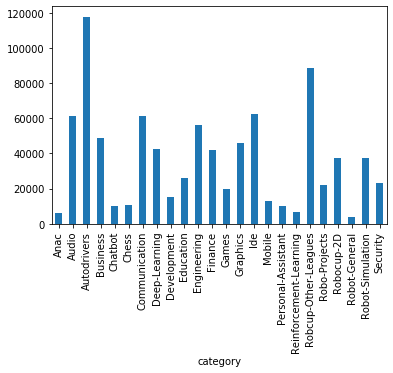

In [70]:
df_robo_all_red.groupby('category').mean()['analizo_total_loc'].plot(kind='bar')